In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
import numpy as np

In [23]:
from calc_pseudo import clean, basic_flops
B_TARGET_PANEL_WIDTH = 48

MAT_PATH = "./../../../example_mats_med/"
mat_paths = sum([[os.path.join(dir, file) for file in files] for dir, _, files in os.walk(MAT_PATH)], [])

mat_flops = {}

for mat_path in mat_paths:
    with open(mat_path) as f:
        test_mat = clean(np.loadtxt(f))
    FLOPS_PER_PANEL = basic_flops(test_mat, B_TARGET_PANEL_WIDTH)
    
    mat_flops[mat_path.split("./../../../")[1]] = FLOPS_PER_PANEL

## Load Data

In [24]:
LN3_DIR = "./../../../logs/regpack_macc/regpack_ln/pyfr/" # ref

GIMMIK_DIR  = "./../../../logs/gimmik/pyfr/"

REF_DIR = "./../../../logs/reg_pack/pyfr/"

ln3_runs = []
gimmik_runs = []
ref_runs = []

NUM_RUNS = 3

for i in range(1,NUM_RUNS+1):
    with open(LN3_DIR+"run_{}.dat".format(i), "rb") as f:
        ln3_runs.append( pickle.load(f) )
    with open(GIMMIK_DIR+"run_{}.dat".format(i), "rb") as f:
        gimmik_runs.append( pickle.load(f) )
    with open(REF_DIR+"run_{}.dat".format(i), "rb") as f:
        ref_runs.append( pickle.load(f) )

## Get Data

In [25]:
shapes = ["quad", "hex", "tri", "tet"]
x_terms = ['a_unique', 'density']

In [26]:
def get_values(x_term, run, mat_flops, t='best'):
    NUM_PANELS = 192000 / 48

    local_best = []
    ref_best = []
    local_best_x, local_best_y = [], []
    ref_best_x, ref_best_y = [], []

    for shape in shapes:
        for i, u in enumerate(run[shape][x_term]):
            FLOPS_PER_PANEL = mat_flops[run[shape]['mat_file'][i]]

            time_per_panel_local = (run[shape]['xsmm_local_'+t][i]*1e-3)/NUM_PANELS
            time_per_panel_ref   = (run[shape]['xsmm_upstream_'+t][i]*1e-3)/NUM_PANELS

            local_best_x.append(u)
            local_best_y.append(FLOPS_PER_PANEL / time_per_panel_local)
            ref_best_x.append(u)
            ref_best_y.append(FLOPS_PER_PANEL / time_per_panel_ref)
    
    old_len = len(local_best_y)

    local_best_y = [x for _,x in sorted(zip(local_best_x,local_best_y))]
    local_best_x.sort()
    
    assert(old_len == len(local_best_y))

    ref_best_y = [x for _,x in sorted(zip(ref_best_x,ref_best_y))]
    ref_best_x.sort()

    return local_best_x, local_best_y, ref_best_x, ref_best_y

In [27]:
def get_values_gimmik(x_term, run, mat_flops, t='best'):
    NUM_PANELS = 192000 / 48

    best = []
    best_x = []
    best_y = []

    for shape in shapes:
        for i, u in enumerate(run[shape][x_term]):
            FLOPS_PER_PANEL = mat_flops[run[shape]['mat_file'][i]]

            time_per_panel = (run[shape]['gimmik_'+t][i]*1e-3)/NUM_PANELS

            best_x.append(u)
            best_y.append(FLOPS_PER_PANEL / time_per_panel)
    
    old_len = len(best_y)

    best_y = [x for _,x in sorted(zip(best_x,best_y))]
    best_x.sort()
    

    return best_x, best_y

# Scatter

In [35]:
# ref
# unique
x_term = "a_unique"
_, _, ref_best_x1, ref_best_y1 = \
    get_values(x_term, ref_runs[0], mat_flops, 'best')
_, _, ref_best_x2, ref_best_y2 = \
    get_values(x_term, ref_runs[2], mat_flops, 'best')
_, _, ref_best_x3, ref_best_y3 = \
    get_values(x_term, ref_runs[0], mat_flops, 'best')
ref_best_y_avg_unique = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]
ref_best_x_unique = ref_best_x1

# density
x_term = "density"
_, _, ref_best_x1, ref_best_y1 = \
    get_values(x_term, ref_runs[0], mat_flops, 'best')
_, _, ref_best_x2, ref_best_y2 = \
    get_values(x_term, ref_runs[1], mat_flops, 'best')
_, _, ref_best_x3, ref_best_y3 = \
    get_values(x_term, ref_runs[2], mat_flops, 'best')
ref_best_y_avg_density = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]
ref_best_x_density = ref_best_x1

In [33]:
# ln3_runs
# unique
x_term = "a_unique"
local_best_x1, local_best_y1, _, _ = \
    get_values(x_term, ln3_runs[0], mat_flops, 'best')
local_best_x2, local_best_y2, _, _ = \
    get_values(x_term, ln3_runs[1], mat_flops, 'best')
local_best_x3, local_best_y3, _, _ = \
    get_values(x_term, ln3_runs[2], mat_flops, 'best')
ln3_best_y_avg_unique = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
ln3_best_x_unique = local_best_x1

# density
x_term = "density"
local_best_x1, local_best_y1, _, _ = \
    get_values(x_term, ln3_runs[0], mat_flops, 'best')
local_best_x2, local_best_y2, _, _ = \
    get_values(x_term, ln3_runs[1], mat_flops, 'best')
local_best_x3, local_best_y3, _, _ = \
    get_values(x_term, ln3_runs[2], mat_flops, 'best')
ln3_best_y_avg_density = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
ln3_best_x_density = local_best_x1

In [34]:
# gimmik
# unique
x_term = "a_unique"
local_best_x1, local_best_y1 = \
    get_values_gimmik(x_term, gimmik_runs[0], mat_flops, 'best')
local_best_x2, local_best_y2 = \
    get_values_gimmik(x_term, gimmik_runs[1], mat_flops, 'best')
local_best_x3, local_best_y3 = \
    get_values_gimmik(x_term, gimmik_runs[2], mat_flops, 'best')
gimmik_best_y_avg_unique = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
gimmik_best_x_unique = local_best_x1

# density
x_term = "density"
local_best_x1, local_best_y1 = \
    get_values_gimmik(x_term, gimmik_runs[0], mat_flops, 'best')
local_best_x2, local_best_y2 = \
    get_values_gimmik(x_term, gimmik_runs[1], mat_flops, 'best')
local_best_x3, local_best_y3 = \
    get_values_gimmik(x_term, gimmik_runs[2], mat_flops, 'best')
gimmik_best_y_avg_density = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
gimmik_best_x_density = local_best_x1

## Process to get best from each

In [36]:
for i in range(len(ln3_best_y_avg_unique)):
    # ln3_runs fastest
    if ln3_best_y_avg_unique[i] > ref_best_y_avg_unique[i] and ln3_best_y_avg_unique[i] > gimmik_best_y_avg_unique[i]:
        ref_best_y_avg_unique[i] = 0
        ref_best_x_unique[i] = 0
        ref_best_x_density[i] = 0

        gimmik_best_y_avg_unique[i] = 0
        gimmik_best_x_unique[i] = 0
        gimmik_best_x_density[i] = 0
    # gimmik fastest
    elif gimmik_best_y_avg_unique[i] > ref_best_y_avg_unique[i] and gimmik_best_y_avg_unique[i] > ln3_best_y_avg_unique[i]:
        ref_best_y_avg_unique[i] = 0
        ref_best_x_unique[i] = 0
        ref_best_x_density[i] = 0

        ln3_best_y_avg_unique[i] = 0
        ln3_best_x_unique[i] = 0
        ln3_best_x_density[i] = 0
    # ref fastest
    else:
        ln3_best_y_avg_unique[i] = 0
        ln3_best_x_unique[i] = 0
        ln3_best_x_density[i] = 0
        
        gimmik_best_y_avg_unique[i] = 0
        gimmik_best_x_unique[i] = 0
        gimmik_best_x_density[i] = 0

ln3_best_y_avg_unique = list(filter(lambda a: a != 0,ln3_best_y_avg_unique))
ln3_best_x_unique = list(filter(lambda a: a != 0, ln3_best_x_unique))
ln3_best_x_density = list(filter(lambda a: a != 0, ln3_best_x_density))

gimmik_best_y_avg_unique = list(filter(lambda a: a != 0, gimmik_best_y_avg_unique))
gimmik_best_x_unique = list(filter(lambda a: a != 0, gimmik_best_x_unique))
gimmik_best_x_density = list(filter(lambda a: a != 0, gimmik_best_x_density))

ref_best_y_avg_unique = list(filter(lambda a: a != 0, ref_best_y_avg_unique))
ref_best_x_unique = list(filter(lambda a: a != 0, ref_best_x_unique))
ref_best_x_density = list(filter(lambda a: a != 0, ref_best_x_density))

## Scatter plot

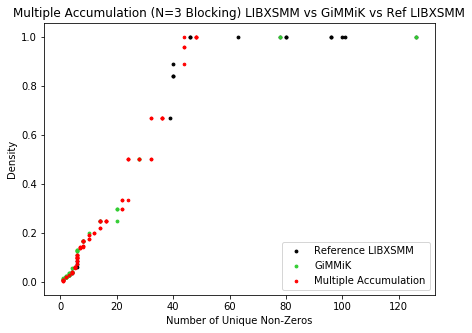

In [50]:
# plot best
plt.figure(figsize=(7,5))
#ax = fig.add_axes([0,0,1,1])

plt.scatter(ref_best_x_unique, ref_best_x_density, s=8, color='black', label="Reference LIBXSMM")
plt.scatter(gimmik_best_x_unique, gimmik_best_x_density, s=8, color='limegreen', label="GiMMiK")
plt.scatter(ln3_best_x_unique, ln3_best_x_density, s=7, color='r', label="Multiple Accumulation")


plt.xlabel('Number of Unique Non-Zeros')
plt.ylabel('Density')
plt.title('Multiple Accumulation (N=3 Blocking) LIBXSMM vs GiMMiK vs Ref LIBXSMM')
plt.legend(loc="lower right")
plt.savefig("./../../../plots/scatter/ln3_gimmik_ref.pdf")
plt.show()